<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/ArbolesP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UDLA
#ISWZ3401-2626_2627-INTELIGENCIA ARTIFICIAL I


---


# Integrantes

* Kevin Coloma
* Fernando Orbe
* Martin Posso


---



#Codigo En Clase

In [ ]:
import numpy as np
import pandas as pd


quemadura_data = pd.read_csv("/content/sample_data/arbQuemadura.csv",index_col=0)
quemadura_data.head()

,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,rubio,medio,bajo,no,si
2,rubio,alto,medio,si,no
3,moreno,bajo,medio,si,no
4,rubio,bajo,medio,no,si
5,rojo,medio,alto,no,si


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura","Peso","Proteccion", "Quemadura"]

for v in var:
  le.fit(quemadura_data[v])
  data[v] = le.transform(quemadura_data[v])

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

t_data,t_respuesta,clf

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1, 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int64, DecisionTreeClassifier(criterion='entropy', max_depth=4))

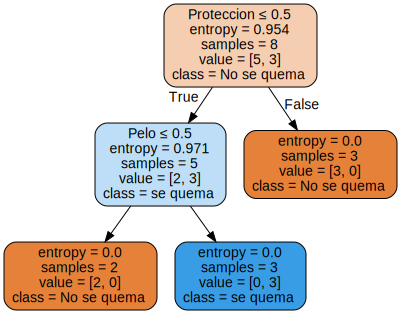

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["No se quema","se quema"],
                                filled = True, rounded = True, special_characters = True)

graph = graphviz.Source(dot_data)
graph

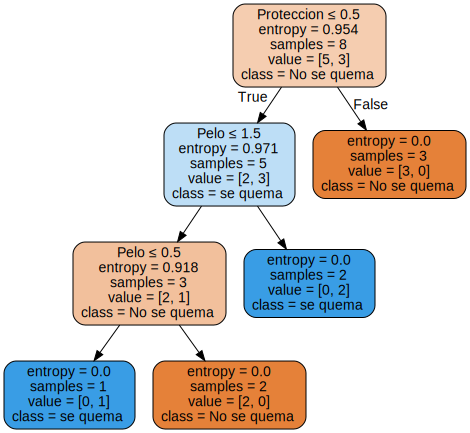

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn import preprocessing

data = quemadura_data.copy()

data["Pelo"] = np.where(data["Pelo"] == "rubio",2,
                        np.where(data["Pelo"] == "moreno",1,0))

data["Altura"] = np.where(data["Altura"] == "medio",2,
                        np.where(data["Altura"] == "alto",1,0))

data["Peso"] = np.where(data["Peso"] == "bajo",2,
                        np.where(data["Peso"] == "medio",1,0))
data["Proteccion"] = np.where(data["Proteccion"] == "si",1,0)

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["No se quema","se quema"],
                                filled = True, rounded = True, special_characters = True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

quemadura_test = pd.read_csv("/content/sample_data/arbQuemaduraTest.csv", index_col=0)


data = pd.DataFrame()
data_test = pd.DataFrame()

le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura","Peso","Proteccion", "Quemadura"]

for v in var:
  le.fit(quemadura_data[v])
  data[v] = le.transform(quemadura_data[v])
  data_test[v] = le.transform(quemadura_test[v])

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]
x_test = data_test[data_test.columns[0:4]]


#crear el modelo
clf = clf.fit(t_data, t_respuesta)
y_respuesta = clf.predict(x_test)
t_data, t_respuesta, y_respuesta

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1, 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int64, array([0]))

In [ ]:
#calcular la entropia
def calcular_entropia(p):
  return -np.sum(p*np.log2(p))

#contar las clases de la caracteristica
valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol 0.9544340029249649


(array(['no', 'si'], dtype=object), array([5, 3]))

In [ ]:
#calcular la ganancia
def calcular_ganancia(valores, var = 'Pelo'):

  valores, cuantos = np.unique(quemadura_data[var], return_counts=True)

  info_a = []

  for e in valores:
    se = np.where(quemadura_data[var]==e)
    print("subconjunto",se)

    se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]
    print("Ejemplos del valor", se_quemadura)

    v_se_quemadura, c_se_quemadura = np.unique(se_quemadura,return_counts=True)
    print("subgrupos",v_se_quemadura,c_se_quemadura)

    #entropia del valor
    se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
    print("entropia del valor",se_entropia)

    #probabilidad del valor
    se_size = sum(c_se_quemadura)/len(quemadura_data.index)
    print("probabilidad",se_size)

    info_a += [[se_entropia, se_size]]
    print("info_a",info_a)

  info_a = np.array(info_a)

  #calcular la entropia de la variable
  info_g = np.sum(info_a[:,0]*info_a[:,1])
  print("entropia de la variable",info_g)
  return info_g

info_a = calcular_ganancia(valores, var = 'Pelo')
ganancia = entropia -info_a
print("ganancia de pelo", ganancia)








subconjunto (array([2, 5, 6]),)
Ejemplos del valor Ejemplo
3    no
6    no
7    no
Name: Quemadura, dtype: object
subgrupos ['no'] [3]
entropia del valor 0.0
probabilidad 0.375
info_a [[0.0, 0.375]]
subconjunto (array([4]),)
Ejemplos del valor Ejemplo
5    si
Name: Quemadura, dtype: object
subgrupos ['si'] [1]
entropia del valor 0.0
probabilidad 0.125
info_a [[0.0, 0.375], [0.0, 0.125]]
subconjunto (array([0, 1, 3, 7]),)
Ejemplos del valor Ejemplo
1    si
2    no
4    si
8    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 2]
entropia del valor 1.0
probabilidad 0.5
info_a [[0.0, 0.375], [0.0, 0.125], [1.0, 0.5]]
entropia de la variable 0.5
ganancia de pelo 0.45443400292496494


In [ ]:
info_a = calcular_ganancia(valores, var = 'Altura')
ganancia = entropia -info_a
print("ganancia de altura", ganancia)

subconjunto (array([1, 5]),)
Ejemplos del valor Ejemplo
2    no
6    no
Name: Quemadura, dtype: object
subgrupos ['no'] [2]
entropia del valor 0.0
probabilidad 0.25
info_a [[0.0, 0.25]]
subconjunto (array([2, 3, 7]),)
Ejemplos del valor Ejemplo
3    no
4    si
8    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.0, 0.25], [0.9182958340544896, 0.375]]
subconjunto (array([0, 4, 6]),)
Ejemplos del valor Ejemplo
1    si
5    si
7    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [1 2]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.0, 0.25], [0.9182958340544896, 0.375], [0.9182958340544896, 0.375]]
entropia de la variable 0.6887218755408672
ganancia de altura 0.2657121273840978


In [ ]:
info_a = calcular_ganancia(valores, var = 'Peso')
ganancia = entropia -info_a
print("ganancia de peso", ganancia)

subconjunto (array([4, 5, 6]),)
Ejemplos del valor Ejemplo
5    si
6    no
7    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.9182958340544896, 0.375]]
subconjunto (array([0, 7]),)
Ejemplos del valor Ejemplo
1    si
8    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [1 1]
entropia del valor 1.0
probabilidad 0.25
info_a [[0.9182958340544896, 0.375], [1.0, 0.25]]
subconjunto (array([1, 2, 3]),)
Ejemplos del valor Ejemplo
2    no
3    no
4    si
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.375
info_a [[0.9182958340544896, 0.375], [1.0, 0.25], [0.9182958340544896, 0.375]]
entropia de la variable 0.9387218755408671
ganancia de peso 0.015712127384097885


In [ ]:
info_a = calcular_ganancia(valores, var = 'Proteccion')
ganancia = entropia -info_a
print("ganancia de proteccion", ganancia)

subconjunto (array([0, 3, 4, 5, 6]),)
Ejemplos del valor Ejemplo
1    si
4    si
5    si
6    no
7    no
Name: Quemadura, dtype: object
subgrupos ['no' 'si'] [2 3]
entropia del valor 0.9709505944546686
probabilidad 0.625
info_a [[0.9709505944546686, 0.625]]
subconjunto (array([1, 2, 7]),)
Ejemplos del valor Ejemplo
2    no
3    no
8    no
Name: Quemadura, dtype: object
subgrupos ['no'] [3]
entropia del valor 0.0
probabilidad 0.375
info_a [[0.9709505944546686, 0.625], [0.0, 0.375]]
entropia de la variable 0.6068441215341679
ganancia de proteccion 0.34758988139079705


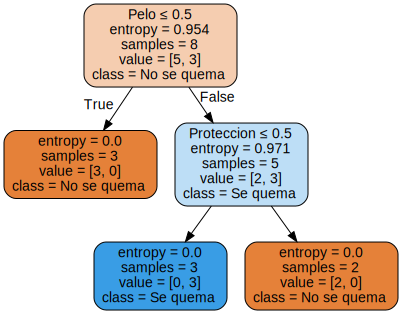

In [ ]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
t_data,t_target,clf

# Visualize tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No se quema", "Se quema"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

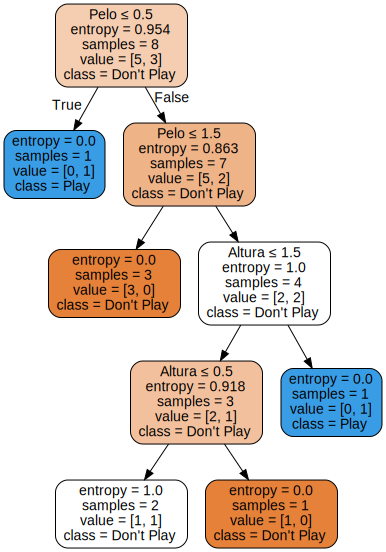

In [ ]:
data = quemadura_data.copy()

data["Pelo"] = np.where(data["Pelo"]=="rubio", 2,
                          np.where(data["Pelo"]=="moreno", 1, 0))

data["Altura"] = np.where(data["Altura"]=="medio", 2,
                               np.where(data["Altura"]=="alto", 1, 0))

data["Peso"] = np.where(data["Peso"]=="bajo", 2,
                        np.where(data["Peso"]=="medio",1,0))

data["Proteccion"] = np.where(data["Proteccion"]=="no", 0, 1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

clf = clf.fit(t_data, t_target)

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["Don't Play", "Play"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
t_data,t_target,clf

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1, 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int64, DecisionTreeClassifier(criterion='entropy', max_depth=4))

In [ ]:
from sklearn import tree
from sklearn import preprocessing

quemadura_test = pd.read_csv("/content/sample_data/arbQuemaduraTest.csv",index_col=0)
data = pd.DataFrame()
data1 = pd.DataFrame()
#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]
for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])
    data1[v] = le.transform(quemadura_test[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
X_test = data1[data1.columns[0:4]]
y_pred = clf.predict(X_test)
y_pred


array([0])

#Instrucciones

---

Utilizando la bilbioteca sklearn para árboles de decisión resuelva cada uno de los siguientes problemas incluyendo el probar el árbol de descisión. Utilice el preprocesamiento de los datos utilizando el preprocessing y con el procesamiento manual

Para probar el árbol tome 2 o 3 ejemplos de la base de cada ejercicio sin la solución y vea cual es el resultado arrojado por el modelo generado

---

Librerias

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import seaborn as sns

#Ejercicio #1 (Temperaturas - Juegos)

> # Using Automatic Processing


In [ ]:
df = pd.read_csv('/content/sample_data/Temperaturas.csv')
df.sample(10)

,Tiempo,Temperatura,Humedad,Viento,Juega?
3,Lluvioso,Media,Alta,No,P
4,Lluvioso,Media,Normal,No,P
8,Soleado,Baja,Normal,No,P
10,Soleado,Media,Normal,Si,P
11,Nuboso,Media,Alta,Si,P
9,Lluvioso,Media,Normal,No,P
5,Lluvioso,Baja,Normal,Si,N
12,Nuboso,Alta,Normal,No,P
0,Soleado,Alta,Alta,No,N
7,Soleado,Media,Alta,No,N


## Transform Dataframe Values into numeric values

* Using prepocessing from SkLearn Label Encoder

In [ ]:
#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = df.columns[:-1]

data = df.copy()

for v in var:
    le.fit(df[v])
    data[v] = le.transform(df[v])

data

,Tiempo,Temperatura,Humedad,Viento,Juega?
0,2,0,0,0,N
1,2,0,0,1,N
2,1,0,0,0,P
3,0,2,0,0,P
4,0,2,1,0,P
5,0,1,1,1,N
6,1,1,1,1,P
7,2,2,0,0,N
8,2,1,1,0,P
9,0,2,1,0,P


## Model fitting

In [ ]:
explicativas = data.drop(columns=['Juega?'])
Objetivo = data['Juega?']

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

model.fit(X=explicativas, y=Objetivo)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Visualization

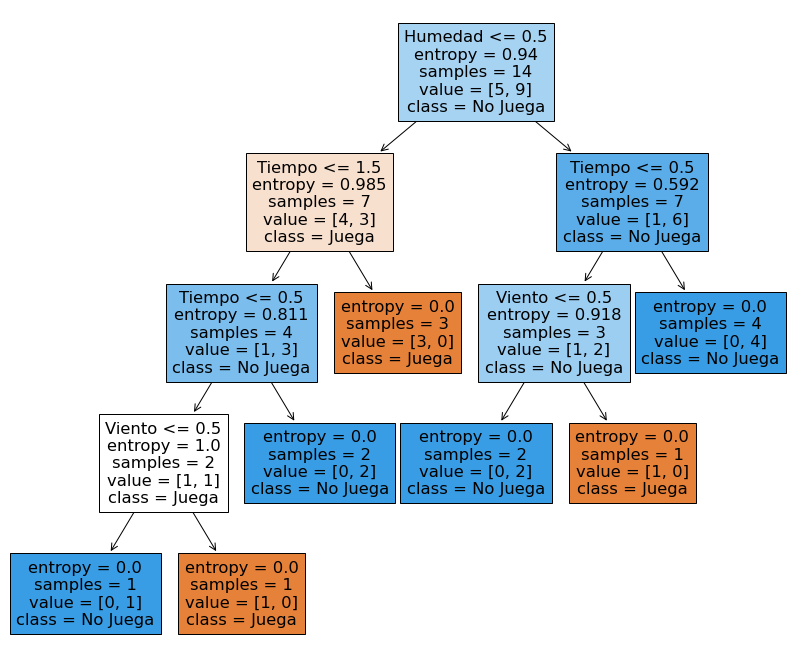

In [ ]:
plt.figure(figsize=(14, 12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, class_names=['Juega', 'No Juega']);

## Model Prediction

---

> ### Example with Dato 10

In [ ]:
a = explicativas.sample()
a

,Tiempo,Temperatura,Humedad,Viento
10,2,2,1,1


In [ ]:
model.predict(a)

array(['P'], dtype=object)

---

> ### Example with Dato 9

In [ ]:
b = explicativas.sample()
b

,Tiempo,Temperatura,Humedad,Viento
9,0,2,1,0


In [ ]:
model.predict(b)

array(['P'], dtype=object)

---

> ### Example with Dato 7

In [ ]:
c = explicativas.sample()
c

,Tiempo,Temperatura,Humedad,Viento
7,2,2,0,0


In [ ]:
model.predict(c)

array(['N'], dtype=object)

### Prediction of all Data

In [ ]:
y_pred = model.predict(explicativas)

## Model Interpretation

El modelo ha seleccionado la variable de Humedad porque existe una diferencia muy grande entre los valores que tienen Humedad alta y las que tienen Humedad Normal, Para cunado se puede jugar N o P

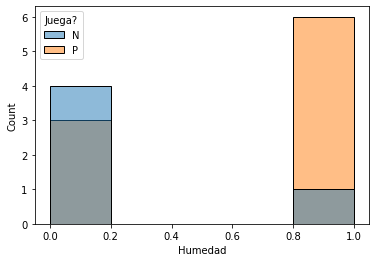

In [ ]:
sns.histplot(x=data['Humedad'], hue=data['Juega?'])

Observamos la prediccion de nuestro modelo con respecto a los valores que son Juega N o Juega P y vemos que si tiene un 100% de acierto

In [ ]:
df['pred'] = y_pred

df[['Juega?', 'pred']]

,Juega?,pred
0,N,N
1,N,N
2,P,P
3,P,P
4,P,P
5,N,N
6,P,P
7,N,N
8,P,P
9,P,P


## How good is our Model?

* hacemos la media de si la predicción es igual al de Juega?, lo cual como podemos ver a continuación nos da un 100% de acierto

In [ ]:
probability = (df['Juega?'] == df['pred']).mean()
percentage = probability * 100

probability, round(percentage)

(1.0, 100)

> # Using Manual Processing

In [ ]:
data = pd.read_csv('/content/sample_data/Temperaturas.csv')
data.sample(10)


,Tiempo,Temperatura,Humedad,Viento,Juega?
4,Lluvioso,Media,Normal,No,P
10,Soleado,Media,Normal,Si,P
11,Nuboso,Media,Alta,Si,P
8,Soleado,Baja,Normal,No,P
1,Soleado,Alta,Alta,Si,N
0,Soleado,Alta,Alta,No,N
9,Lluvioso,Media,Normal,No,P
5,Lluvioso,Baja,Normal,Si,N
7,Soleado,Media,Alta,No,N
6,Nuboso,Baja,Normal,Si,P


## Manual Transformation

In [ ]:
data["Tiempo"] = np.where(data["Tiempo"] == "Soleado",2, np.where(data["Tiempo"] == "Nuboso",1,0))
data["Temperatura"] = np.where(data["Temperatura"] == "Alta",2, np.where(data["Temperatura"] == "Media",1,0))
data["Humedad"] = np.where(data["Humedad"] == "Alta",1,0)
data["Viento"] = np.where(data["Viento"] == "Si",1,0)

data

,Tiempo,Temperatura,Humedad,Viento,Juega?
0,2,2,1,0,N
1,2,2,1,1,N
2,1,2,1,0,P
3,0,1,1,0,P
4,0,1,0,0,P
5,0,0,0,1,N
6,1,0,0,1,P
7,2,1,1,0,N
8,2,0,0,0,P
9,0,1,0,0,P


## Model Fitting

In [ ]:
explicativas = data.drop(columns=['Juega?'])
Objetivo = data['Juega?']

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

model.fit(X=explicativas, y=Objetivo)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Visualization

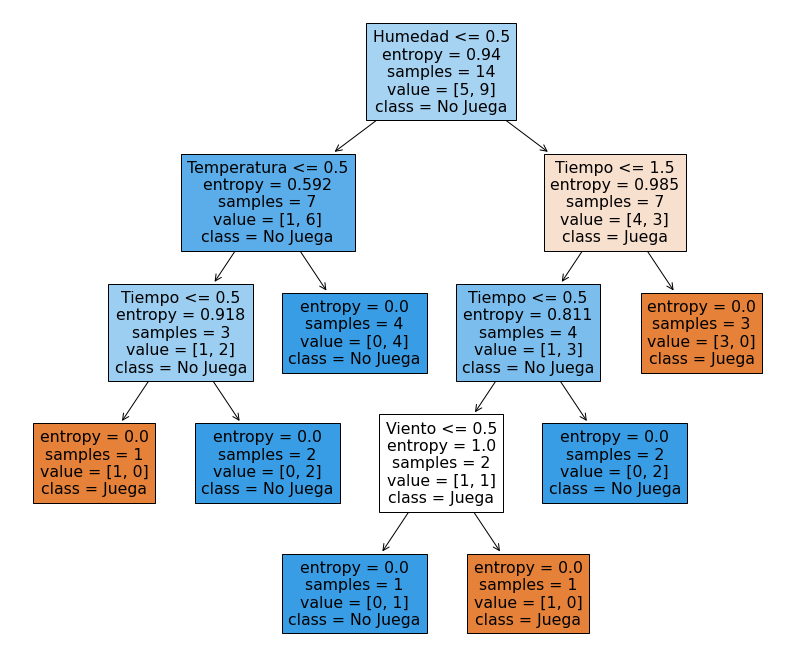

In [ ]:
plt.figure(figsize=(14, 12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, class_names=['Juega', 'No Juega']);

## Model Prediction



---

> ### Example with Dato 1

In [ ]:
a = explicativas.sample()
a

,Tiempo,Temperatura,Humedad,Viento
1,2,2,1,1


In [ ]:
model.predict(a)

array(['N'], dtype=object)

---

> ### Example with Dato 8

In [ ]:
b = explicativas.sample()
b

,Tiempo,Temperatura,Humedad,Viento
8,2,0,0,0


In [ ]:
model.predict(b)

array(['P'], dtype=object)

---

> ### Example with Dato 10

In [ ]:
c = explicativas.sample()
c

,Tiempo,Temperatura,Humedad,Viento
10,2,1,0,1


In [ ]:
model.predict(c)

array(['P'], dtype=object)

---

> ### Example with Dato 5

In [ ]:
d = explicativas.sample()
d

,Tiempo,Temperatura,Humedad,Viento
5,0,0,0,1


In [ ]:
model.predict(d)

array(['N'], dtype=object)

### Prediction of all Data

In [ ]:
y_pred = model.predict(explicativas)

## Model Interpretation

El modelo ha seleccionado la variable de Humedad porque existe una diferencia muy grande entre los valores que tienen Humedad Alta y las que tienen Humedad Normal, con Juega N y Juega P

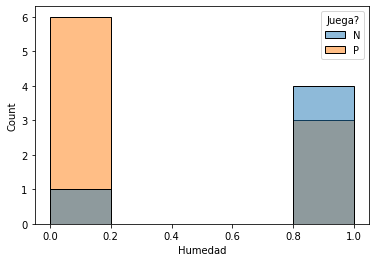

In [ ]:
sns.histplot(x=data['Humedad'], hue=data['Juega?'])

Observamos la prediccion de nuestro modelo con respecto a los valores que Juega P y Juega N y vemos que si tiene un 100% de acierto

In [ ]:
data['pred'] = y_pred

data[['Juega?', 'pred']]

,Juega?,pred
0,N,N
1,N,N
2,P,P
3,P,P
4,P,P
5,N,N
6,P,P
7,N,N
8,P,P
9,P,P


## How good is our Model?

* hacemos la media de si la predicción es igual al de Juega?, lo cual como podemos ver a continuación nos da un 100% de acierto

In [ ]:
probability = (data['Juega?'] == data['pred']).mean()
percentage = probability * 100

probability, round(percentage)

(1.0, 100)

#Ejercicio #2 (Farmacos)

> # Using Automatic Processing


In [ ]:
df = pd.read_csv('/content/sample_data/Farmacos.csv')
df.sample(10)

,Paciente,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias,Administrar Farmaco F
13,14,Baja,Alto,Bajo,No,No,Si
0,1,Alta,Alto,Alto,No,No,Si
3,4,Media,Alto,Alto,No,Si,No
8,9,Alta,Alto,Bajo,Si,Si,No
2,3,Baja,Alto,Bajo,No,No,Si
4,5,Media,Bajo,Alto,Si,Si,No
1,2,Alta,Alto,Alto,Si,No,Si
5,6,Baja,Bajo,Alto,Si,Si,Si
6,7,Alta,Bajo,Alto,Si,No,Si
12,13,Baja,Alto,Alto,Si,Si,Si


## Transform Dataframe Values into numeric values

* Using prepocessing from SkLearn Label Encoder

In [ ]:
#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = df.columns[:-1]

data = df.copy()

for v in var:
    le.fit(df[v])
    data[v] = le.transform(df[v])

data

,Paciente,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias,Administrar Farmaco F
0,0,0,0,0,0,0,Si
1,1,0,0,0,1,0,Si
2,2,1,0,1,0,0,Si
3,3,2,0,0,0,1,No
4,4,2,1,0,1,1,No
5,5,1,1,0,1,1,Si
6,6,0,1,0,1,0,Si
7,7,0,1,1,0,1,Si
8,8,0,0,1,1,1,No
9,9,1,1,0,1,1,Si


## Model fitting

In [ ]:
explicativas = data.drop(columns=['Paciente', ' Administrar Farmaco F'])
Objetivo = data[' Administrar Farmaco F']

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

model.fit(X=explicativas, y=Objetivo)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Visualization

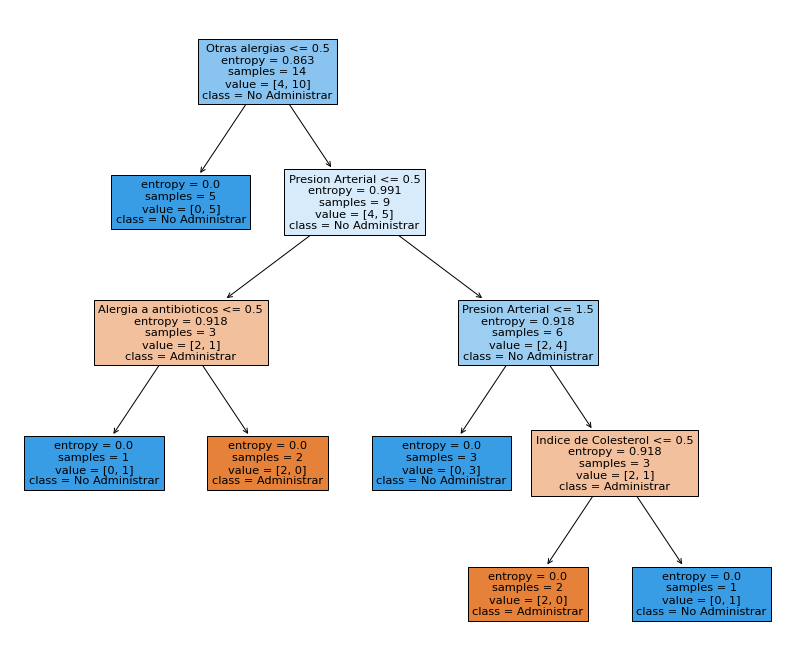

In [ ]:
plt.figure(figsize=(14, 12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, class_names=['Administrar', 'No Administrar']);

## Prediction Calculation

---

### Example with Paciente 4

In [ ]:
a = explicativas.sample()
a

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
4,2,1,0,1,1


In [ ]:
model.predict(a)

array(['No'], dtype=object)

---

### Example with Paciente 1



In [ ]:
b = explicativas.sample()
b

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
1,0,0,0,1,0


In [ ]:
model.predict(b)

array(['Si'], dtype=object)

---

### Example with Paciente 8

In [ ]:
c = explicativas.sample()
c

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
8,0,0,1,1,1


In [ ]:
model.predict(c)

array(['No'], dtype=object)

---

### Example with Paciente 3

In [ ]:
d = explicativas.sample()
d

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
3,2,0,0,0,1


In [ ]:
model.predict(d)

array(['No'], dtype=object)

---

### Prediction of all model

In [ ]:
y_pred = model.predict(explicativas)

## Model Interpretation

El modelo ha seleccionado la variable de Otras Alergias porque existe una diferencia muy grande entre los valores que tienen Otras Alergias y las que no tienen, con las personas que serán administradas el farmaco F

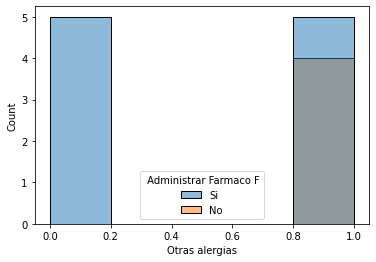

In [ ]:
sns.histplot(x=data['Otras alergias'], hue=data[' Administrar Farmaco F'])

Observamos la prediccion de nuestro modelo con respecto a los valores que son administrados los Farmacos y vemos que si tiene un 100% de acierto

In [ ]:
df['pred'] = y_pred

df[[' Administrar Farmaco F', 'pred']]

,Administrar Farmaco F,pred
0,Si,Si
1,Si,Si
2,Si,Si
3,No,No
4,No,No
5,Si,Si
6,Si,Si
7,Si,Si
8,No,No
9,Si,Si


## How good is our model?
* hacemos la media de si la predicción es igual al de Administrar farmaco, lo cual como podemos ver a continuación nos da un 100% de acierto

In [ ]:
probability = (df[' Administrar Farmaco F'] == df['pred']).mean()
percentage = probability * 100

probability, round(percentage)

(1.0, 100)

* Using Manual Processing

> # Using Manual Processing

In [ ]:
data = pd.read_csv('/content/sample_data/Farmacos.csv')
data

,Paciente,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias,Administrar Farmaco F
0,1,Alta,Alto,Alto,No,No,Si
1,2,Alta,Alto,Alto,Si,No,Si
2,3,Baja,Alto,Bajo,No,No,Si
3,4,Media,Alto,Alto,No,Si,No
4,5,Media,Bajo,Alto,Si,Si,No
5,6,Baja,Bajo,Alto,Si,Si,Si
6,7,Alta,Bajo,Alto,Si,No,Si
7,8,Alta,Bajo,Bajo,No,Si,Si
8,9,Alta,Alto,Bajo,Si,Si,No
9,10,Baja,Bajo,Alto,Si,Si,Si


## Manual Transformation

In [ ]:
data["Presion Arterial"] = np.where(data["Presion Arterial"] == "Alta",2, np.where(data["Presion Arterial"] == "Media",1,0))
data["Azucar en Sangre"] = np.where(data["Azucar en Sangre"] == "Alto",1,0)
data["Indice de Colesterol"] = np.where(data["Indice de Colesterol"] == "Alto",1,0)
data["Alergia a antibioticos"] = np.where(data["Alergia a antibioticos"] == "Si",1,0)
data["Otras alergias"] = np.where(data["Otras alergias"] == "Si",1,0)

data

,Paciente,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias,Administrar Farmaco F
0,1,2,1,1,0,0,Si
1,2,2,1,1,1,0,Si
2,3,0,1,0,0,0,Si
3,4,1,1,1,0,1,No
4,5,1,0,1,1,1,No
5,6,0,0,1,1,1,Si
6,7,2,0,1,1,0,Si
7,8,2,0,0,0,1,Si
8,9,2,1,0,1,1,No
9,10,0,0,1,1,1,Si


## Model Fitting

In [ ]:
explicativas = data.drop(columns=['Paciente', ' Administrar Farmaco F'])
Objetivo = data[' Administrar Farmaco F']

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

model.fit(X=explicativas, y=Objetivo)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Visualization

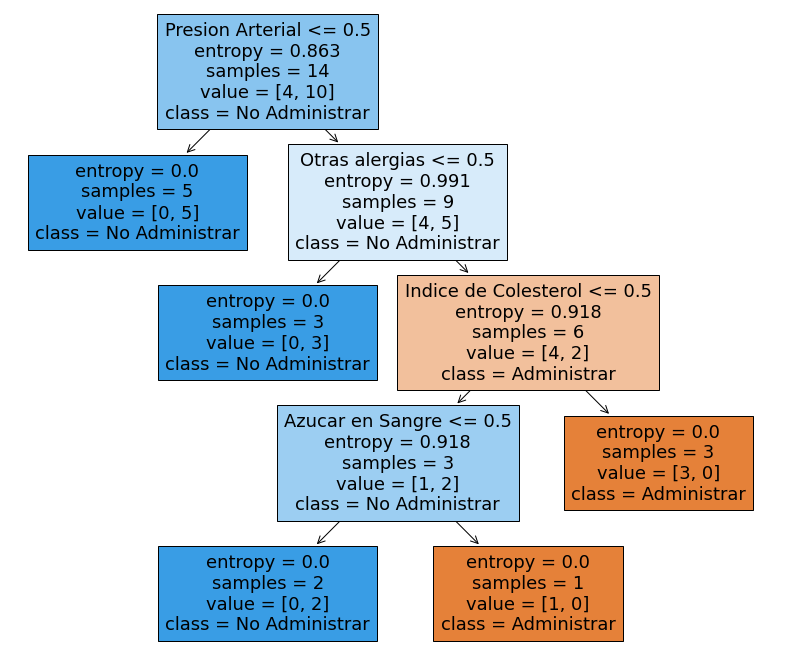

In [ ]:
plt.figure(figsize=(14, 12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, class_names=['Administrar', 'No Administrar']);

## Model Prediction

---

> ### Example with Paciente 10

In [ ]:
a = explicativas.sample()
a

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
10,1,0,0,1,1


In [ ]:
model.predict(a)

array(['Si'], dtype=object)

---

> ### Example with Paciente 12

In [ ]:
b = explicativas.sample()
b

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
12,0,1,1,1,1


In [ ]:
model.predict(b)

array(['Si'], dtype=object)

---

> ### Example with Paciente 5

In [ ]:
c = explicativas.sample()
c

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
5,0,0,1,1,1


In [ ]:
model.predict(c)

array(['Si'], dtype=object)

---

> ### Example with Paciente 11

In [ ]:
d = explicativas.sample()
d

,Presion Arterial,Azucar en Sangre,Indice de Colesterol,Alergia a antibioticos,Otras alergias
11,2,0,1,1,1


In [ ]:
model.predict(d)

array(['No'], dtype=object)

### Prediction of all Data

In [ ]:
y_pred = model.predict(explicativas)

## Model Interpretation

El modelo ha seleccionado la variable de Presion Arterial porque existe una diferencia muy grande entre los valores que tienen Presion Arterial Baja y las que no tienen, con las personas que serán administradas el farmaco F

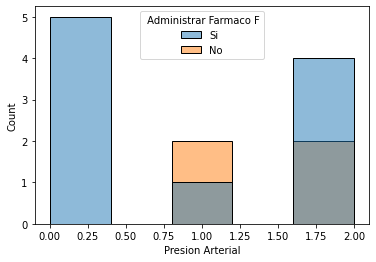

In [ ]:
sns.histplot(x=data['Presion Arterial'], hue=data[' Administrar Farmaco F'])

Observamos la prediccion de nuestro modelo con respecto a los valores que son administrados los Farmacos y vemos que si tiene un 100% de acierto

In [ ]:
data['pred'] = y_pred

data[[' Administrar Farmaco F', 'pred']]

,Administrar Farmaco F,pred
0,Si,Si
1,Si,Si
2,Si,Si
3,No,No
4,No,No
5,Si,Si
6,Si,Si
7,Si,Si
8,No,No
9,Si,Si


## How good is our Model?

* hacemos la media de si la predicción es igual al de Administrar farmaco, lo cual como podemos ver a continuación nos da un 100% de acierto

In [ ]:
probability = (data[' Administrar Farmaco F'] == data['pred']).mean()
percentage = probability * 100

probability, round(percentage)

(1.0, 100)